In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt

In [3]:
# Importing some data:
start = dt.datetime(2014,1,1)
end = dt.datetime(2015,1,1)
df_AAPL = web.DataReader('AAPL', "yahoo", start, end)
df_MSFT  = web.DataReader('MSFT', "yahoo", start, end)
df_AAPL.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1, inplace=True)
df_MSFT.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1, inplace=True)

df_AAPL = df_AAPL.rename(columns={"Adj Close":"AAPL"})
df_MSFT = df_MSFT.rename(columns={"Adj Close":"MSFT"})

df = pd.concat([df_AAPL, df_MSFT], axis=1)

In [4]:
df.head()

,AAPL,MSFT
Date,,
2014-01-02,17.568451,31.983477
2014-01-03,17.182550,31.768301
2014-01-06,17.276245,31.096956
2014-01-07,17.152693,31.337952
2014-01-08,17.261324,30.778502


In [5]:
df["MSFT"].head()

Date
2014-01-02    31.983477
2014-01-03    31.768301
2014-01-06    31.096956
2014-01-07    31.337952
2014-01-08    30.778502
Name: MSFT, dtype: float64

# Histogram

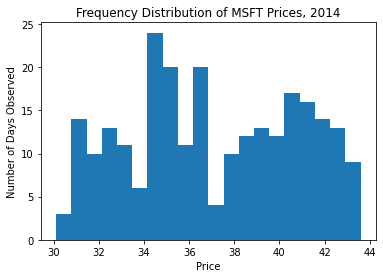

In [11]:
# Plot a histogram using 20 bins:
plt.hist(df["MSFT"], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

# Returns Histogram

In [10]:
# We will start with 1 because obviously, we don't have any data for the 1st element (i.e. 0)
R  = df['MSFT'].pct_change()[1:]
print(R)

Date
2014-01-03   -0.006728
2014-01-06   -0.021133
2014-01-07    0.007750
2014-01-08   -0.017852
2014-01-09   -0.006432
                ...   
2014-12-24   -0.006398
2014-12-26   -0.005401
2014-12-29   -0.008981
2014-12-30   -0.009062
2014-12-31   -0.012123
Name: MSFT, Length: 251, dtype: float64


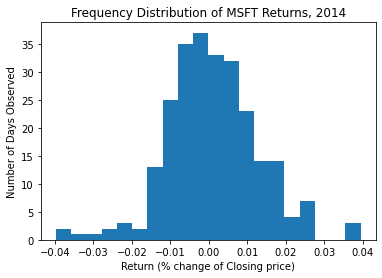

In [15]:
# Let us draw the histogram of the returns:
plt.hist(R, bins=20)
plt.xlabel('Return (% change of Closing price)')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

# Cumulative Histogram

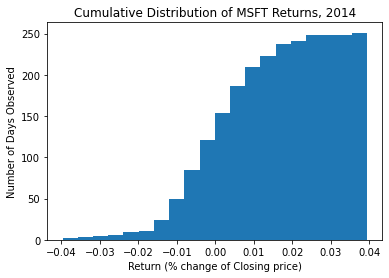

In [16]:
# Let us draw the cumulative histogram of the returns:
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return (% change of Closing price)')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

# Scatter Plot

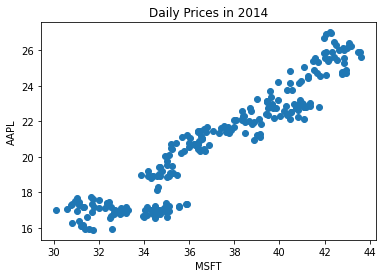

In [18]:
plt.scatter(df['MSFT'], df['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

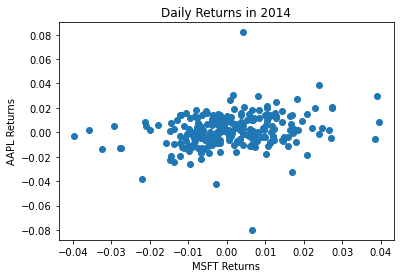

In [19]:
# We can also observe the scatter plot for returns:
r_msft = df['MSFT'].pct_change()[1:]
r_aapl = df['AAPL'].pct_change()[1:]

plt.scatter(r_msft, r_aapl)
plt.xlabel('MSFT Returns')
plt.ylabel('AAPL Returns')
plt.title('Daily Returns in 2014');

# Line Graph

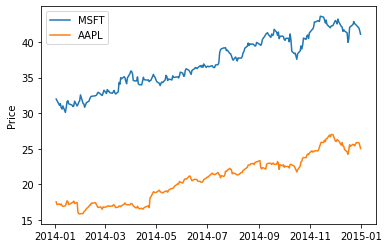

In [21]:
# Line Graph of Closing Prices:
plt.plot(df['MSFT'])
plt.plot(df['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

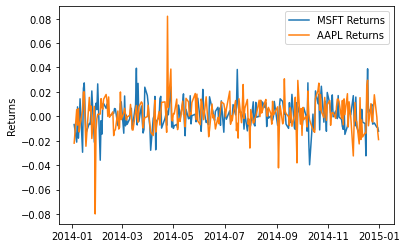

In [23]:
# Line Graph of Returns:
plt.plot(r_msft)
plt.plot(r_aapl)
plt.ylabel('Returns')
plt.legend(['MSFT Returns', 'AAPL Returns']);